{}

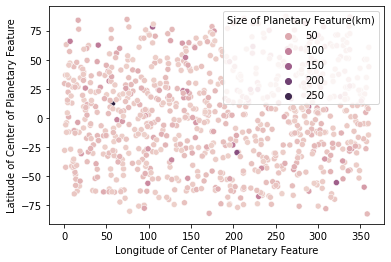

In [29]:
from scripts2 import project_functions
df = project_functions.load_and_process('../../data/raw/nomenclature.csv')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

venusdata = df[df['Planet Name'] == "Venus"]


venuscraterdata = venusdata[venusdata['FeatureType'] == ' crater '] 

sns.scatterplot(data = venuscraterdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='Size of Planetary Feature(km)')


names = df['Planet Name']




#venusdata
#plt.xlabel("Longitude", size=20)
#plt.ylabel("Latitude", size=20)

<AxesSubplot:xlabel='Longitude of Center of Planetary Feature', ylabel='Latitude of Center of Planetary Feature'>

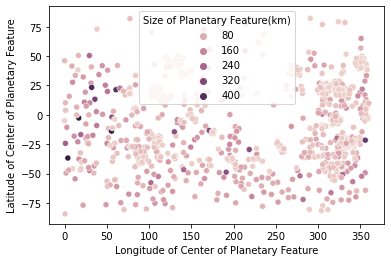

In [19]:
marsdata = df[df['Planet Name'] == "Mars"]
marscraterdata = marsdata[marsdata['FeatureType'] == ' crater '] 

sns.scatterplot(data = marscraterdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='Size of Planetary Feature(km)')
 

In [37]:
a = df['Planet Name'].unique()
a

array(['Mars', 'Moon', 'Titan', 'Mercury', 'Dione', 'Rhea', 'Ganymede',
       'Ceres', 'Callisto', 'Triton', 'Mimas', 'Vesta', 'Europa', 'Pluto',
       'Venus', 'Ariel', 'Tethys', 'Oberon', 'Charon', 'Titania',
       'Miranda', 'Steins', 'Enceladus', 'Phobos', 'Eros', 'Epimetheus',
       'Iapetus', 'Amalthea', 'Thebe', 'Gaspra', 'Puck', 'Lutetia',
       'Deimos', 'Phoebe', 'Janus', 'Proteus', 'Hyperion', 'Ida',
       'Mathilde', 'Umbriel', 'Dactyl', 'Itokawa', 'Ryugu', 'Io', 'Bennu'],
      dtype=object)

<AxesSubplot:xlabel='Longitude of Center of Planetary Feature', ylabel='Latitude of Center of Planetary Feature'>

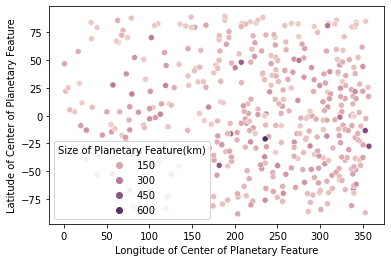

In [39]:
mercurydata = df[df['Planet Name'] == "Mercury"]
mercurycraterdata = mercurydata[mercurydata['FeatureType'] == ' crater '] 

sns.scatterplot(data = mercurycraterdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='Size of Planetary Feature(km)')
 

In [57]:
a = df['Planet Name'].unique()
for i in a:
  
    test = df[df['Planet Name'] ==i]
    test2 = test[test['FeatureType'] == ' crater '].size
    if test2 > 1000:
        print(test2)
        print(i)

10143
Mars
14202
Moon
3744
Mercury
1152
Rhea
1161
Ganymede
1035
Ceres
1269
Callisto
7929
Venus


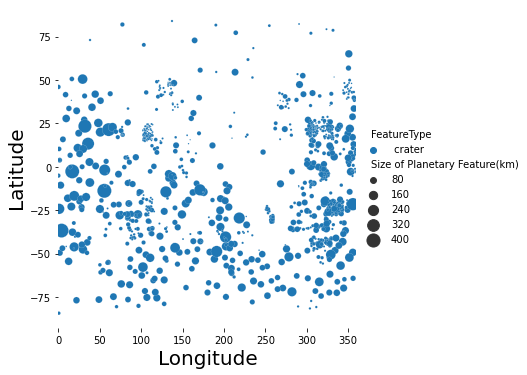

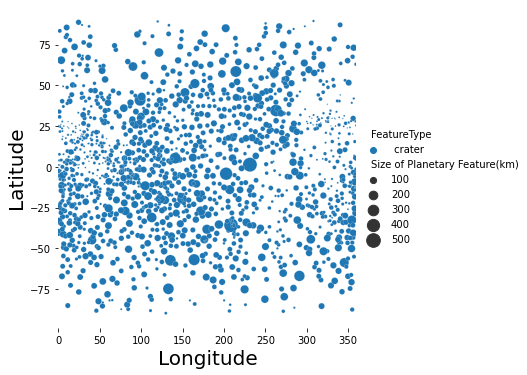

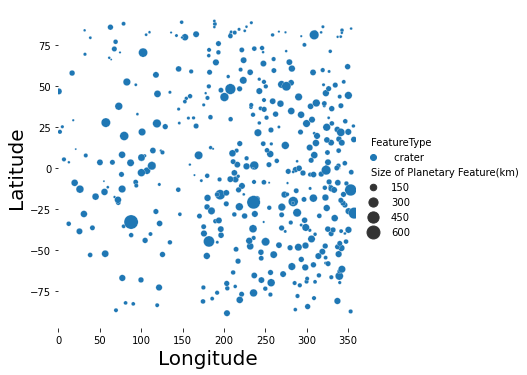

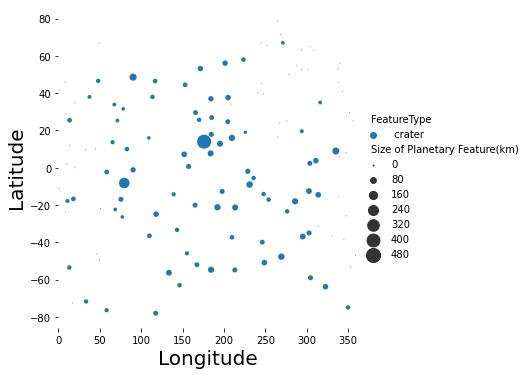

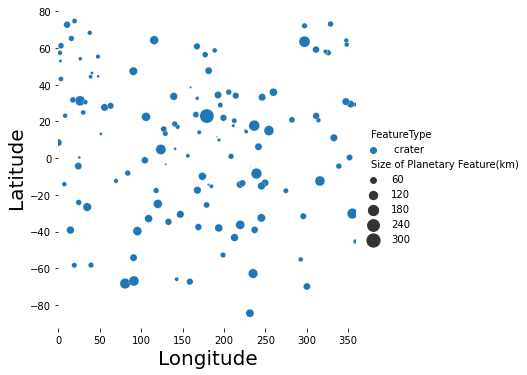

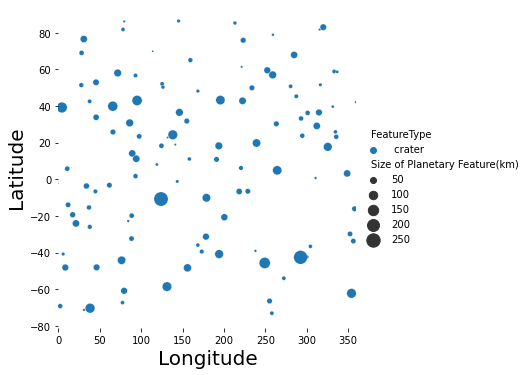

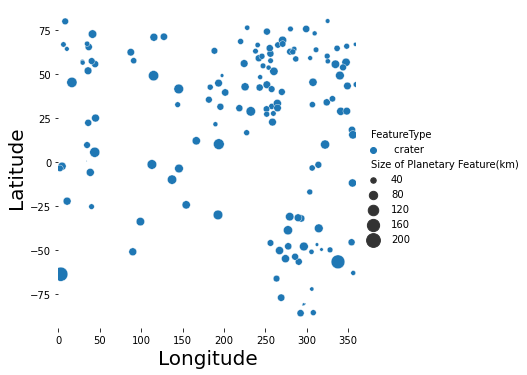

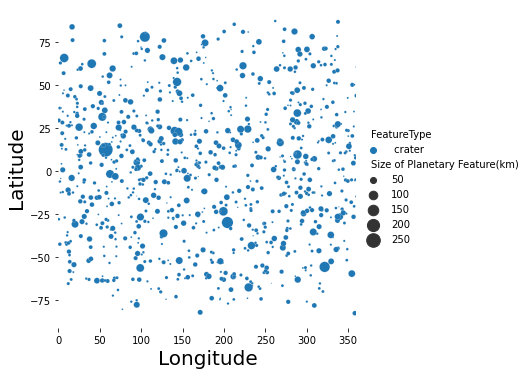

In [56]:
a = df['Planet Name'].unique()
for i in a:
    test = df[df['Planet Name'] ==i]
    test2 = test[test['FeatureType'] == ' crater '] 
    c = sns.color_palette("flare", as_cmap=True)
    
    test3 = test[test['FeatureType'] == ' crater '].size 
    
    if test3 > 1000:  
        moon_feat_size_map = sns.relplot(
        data=test2,
        y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
        hue="FeatureType", size="Size of Planetary Feature(km)",
        sizes=(1, 200))
        moon_feat_size_map.set(xlim=(0, 360))
        moon_feat_size_map.ax.xaxis.grid(True, "minor", linewidth=.25)
        moon_feat_size_map.ax.yaxis.grid(True, "minor", linewidth=.25)
        moon_feat_size_map.set_xlabels("Longitude", size=20)
        moon_feat_size_map.set_ylabels("Latitude", size=20)
        moon_feat_size_map.despine(left=True, bottom=True)
  
